In [1]:
import numpy as np
from pandas import Series, DataFrame
import pandas as pd

In [2]:
df=pd.read_json('./First.json').sort_index()

In [3]:
df.head()

,country,countryCoded,degree,degreeCoded,eng,engCoded,fieldGroup,fund,gpaBachelors,gpaMasters,gre,highLevelBachUni,highLevelMasterUni,paper,targetUni,uniRank,year
2,united kingdom,4,Doctorate,1,High,1,7,TRUE,3.500000,3.442986,FALSE,FALSE,FALSE,6.666667,heriot-watt,692.0,2007
3,united states,0,Doctorate,1,VeryHigh,0,5,TRUE,2.500000,3.500000,TRUE,TRUE,FALSE,11.333333,northwestern,20.0,2010
5,united states,0,Doctorate,1,VeryHigh,0,10,TRUE,3.500000,4.000000,TRUE,TRUE,TRUE,5.333333,cornell,11.0,2008
6,sweden,2,Masters,0,High,1,0,FALSE,3.000000,3.442986,TRUE,TRUE,FALSE,0.000000,chalmers,443.0,2008
7,spain,3,Masters,0,VeryHigh,0,10,TRUE,2.611309,3.442986,FALSE,FALSE,FALSE,0.000000,carlos iii de madrid,NaN,2008


In [4]:
eng=pd.read_json('./IELTS.json').sort_index().engExamResult

In [5]:
field=pd.read_json('./Field.json').sort_index().field

In [6]:
temp=pd.read_json('./Rejected.json').sort_index()
rej=temp.rejUni
fund=temp.fund

In [7]:
df.eng=eng
df['rejUni']=rej
df['fundValue']=fund
df['field']=field

In [8]:
del df['engCoded']

In [9]:
#Round

In [10]:
df['paper'] = df['paper'].apply(round)

In [11]:
def roundHalf(number):
    return round(number * 2) / 2

In [12]:
df['gpaBachelors'] = df['gpaBachelors'].apply(roundHalf)

In [13]:
#Rename

In [14]:
df = df.rename(
    columns={
        'highLevelBachUni': 'highBU', 
        'highLevelMasterUni': 'highMU',
        'countryCoded': 'countryCode',
        'degreeCoded': 'degreeCode',
        'gpaBachelors': 'gpaB',
        'gpaMasters': 'gpaM'
    }
)

In [15]:
# fieldGroup

In [16]:
df.fieldGroup.value_counts().sort_index().index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18], dtype='int64')

In [17]:
for x in df.fieldGroup.value_counts().sort_index().index:
    df['fieldG_'+str(x)]=False

In [18]:
for i in df.index:
    inx=str(df.ix[i]['fieldGroup'])
    df.loc[i,'fieldG_'+inx]=True

In [19]:
## GRE

In [20]:
gre=pd.read_json('./GRE/GRE.json').sort_index()
df['greQ']=gre.engExamQuan
df['greV']=gre.engExamVrbl
df['greW']=gre.engExamAnlt

In [21]:
df.head()

,country,countryCode,degree,degreeCode,eng,fieldGroup,fund,gpaB,gpaM,gre,...,fieldG_12,fieldG_13,fieldG_14,fieldG_15,fieldG_16,fieldG_17,fieldG_18,greQ,greV,greW
2,united kingdom,4,Doctorate,1,8.0,7,TRUE,3.5,3.442986,FALSE,...,False,False,False,False,False,False,False,n/a,n/a,n/a
3,united states,0,Doctorate,1,8.0,5,TRUE,2.5,3.500000,TRUE,...,False,False,False,False,False,False,False,760,330,3
5,united states,0,Doctorate,1,8.0,10,TRUE,3.5,4.000000,TRUE,...,False,False,False,False,False,False,False,800,320,3.5
6,sweden,2,Masters,0,7.0,0,FALSE,3.0,3.442986,TRUE,...,False,False,False,False,False,False,False,800,310,3
7,spain,3,Masters,0,8.0,10,TRUE,2.5,3.442986,FALSE,...,False,False,False,False,False,False,False,n/a,n/a,n/a


In [22]:
df.columns

Index([    u'country', u'countryCode',      u'degree',  u'degreeCode',
               u'eng',  u'fieldGroup',        u'fund',        u'gpaB',
              u'gpaM',         u'gre',      u'highBU',      u'highMU',
             u'paper',   u'targetUni',     u'uniRank',        u'year',
            u'rejUni',   u'fundValue',       u'field',    u'fieldG_0',
          u'fieldG_1',    u'fieldG_2',    u'fieldG_3',    u'fieldG_4',
          u'fieldG_5',    u'fieldG_6',    u'fieldG_7',    u'fieldG_8',
          u'fieldG_9',   u'fieldG_10',   u'fieldG_11',   u'fieldG_12',
         u'fieldG_13',   u'fieldG_14',   u'fieldG_15',   u'fieldG_16',
         u'fieldG_17',   u'fieldG_18',        u'greQ',        u'greV',
              u'greW'],
      dtype='object')

In [23]:
df[df.greW=='n/a'].gre.value_counts()

FALSE    1966
Name: gre, dtype: int64

In [24]:
# Fix Gre Writing

In [25]:
import matplotlib.pyplot as plt

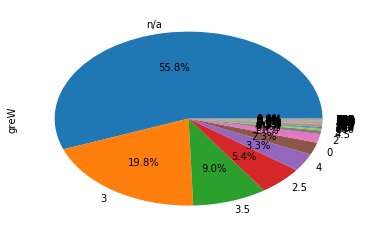

In [26]:
df.greW.value_counts().plot(autopct='%1.1f%%',kind='pie')
plt.show()

In [27]:
df[df.greW=='n/a']['greW'].count()

1966

In [28]:
df.loc[df.greW=='n/a','greW']=-1

In [29]:
df.greW= df.greW.apply(float)

In [30]:
df.loc[df.greW==-1,'greW']=np.nan

In [31]:
df.loc[df.greW>6,'greW']=3

In [32]:
df.loc[df.greW==0,'greW']=3

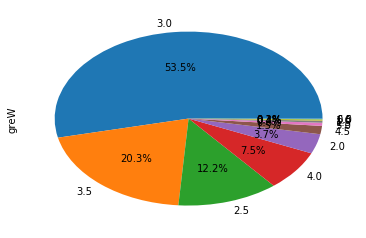

In [33]:
df.greW.value_counts().plot(autopct='%1.1f%%',kind='pie')
plt.show()

In [34]:
# Fix Gre Q & V

In [35]:
df.loc[df.greQ=='n/a','greQ']=0
df.loc[df.greV=='n/a','greV']=0

In [36]:
df.greQ= df.greQ.apply(float)
df.greV= df.greV.apply(float)

In [37]:
df.loc[df.greQ==0,'greQ']=np.nan
df.loc[df.greV==0,'greV']=np.nan

In [38]:
df.greQ.value_counts().sort_values(ascending=False).head(2)

800.0    254
780.0     72
Name: greQ, dtype: int64

In [39]:
df.greV.value_counts().sort_values(ascending=False).head(2)

300.0    78
143.0    65
Name: greV, dtype: int64

In [40]:
df.loc[df.greQ<130,'greQ']=780.0
df.loc[df.greV<130,'greV']=143.0

In [41]:
quant=pd.read_json('./GRE/quant.json')
verbal=pd.read_json('./GRE/verbal.json')

In [42]:
for x in verbal.columns:
    verbal[x]=verbal[x].apply(int)
    quant[x]=quant[x].apply(int)

In [43]:
quant.head(2)

,% Rank,Current Scale,Prior Scale
0,92,166,800
1,88,164,790


In [44]:
verbal.head(2)

,% Rank,Current Scale,Prior Scale
0,99,170,800
1,99,170,790


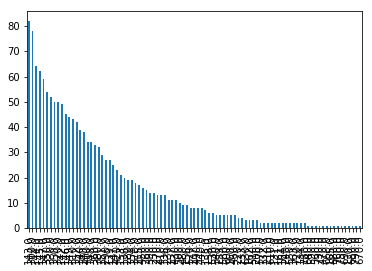

In [45]:
df.greV.value_counts().plot(kind='bar')
plt.show()

In [46]:
def rankV(num):
    if (num>=200) & (num<=800):
        num=roundHalf(num/100.0)*100
        old=verbal[verbal['Prior Scale']==num]['Current Scale']
        return old.values[0]
    else: return num
def rankQ(num):
    if (num>=200) & (num<=800):
        num=roundHalf(num/100.0)*100
        old=quant[quant['Prior Scale']==num]['Current Scale']
        return old.values[0]
    else: return num

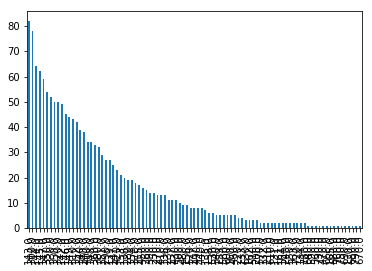

In [47]:
df.greV.value_counts().plot(kind='bar')
plt.show()

In [48]:
df.greV=df.greV.apply(rankV)
df.greQ=df.greQ.apply(rankQ)

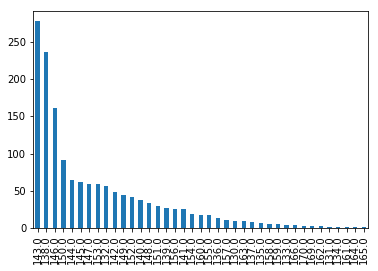

In [49]:
df.greV.value_counts().plot(kind='bar')
plt.show()

In [50]:
df.fund= df.fund=='TRUE'
df.gre= df.gre=='TRUE'
df.highMU= df.highMU=='TRUE'
df.highBU= df.highBU=='TRUE'

In [51]:
df.to_json('Second.json',date_format='utf8')